# Load BSON files

In [108]:
import os
import numpy as np
import bson

def getBsonFiles(DIR):
    files = os.listdir(DIR)
    bson_files = []

    for f in files:
        if ".bson" in f:
            bson_files.append(f)

    print(bson_files)
    return bson_files

In [111]:
DATA_DIR = os.getcwd() + "/data/fddg-db2/fddg"

In [112]:
bson_files = getBsonFiles(DATA_DIR)

['users.bson', 'metas.bson', 'chunks.bson']


In [113]:
bson_data = {}

for b in bson_files:
    with open(DATA_DIR + "/" + b, "rb") as f:
        bson_data[b] = bson.decode_all(f.read())

# Load all BSON data into class objects

In [114]:
class Meta:
    def __init__(self, json_doc):
        self._id = json_doc["_id"]
        self.subject_id = json_doc["subject_id"]
        self.phone_placement = json_doc["phone_placement"]
        self.recording_duration = json_doc["recording_duration"]
        self.chunk_ids = json_doc["chunk_ids"]
        
class Chunk:
    def __init__(self, json_doc):
        self._id = json_doc["_id"]
        self.recording_id = json_doc["recording_id"]
        self.chunk_index = json_doc["chunk_index"]
        self.labels = json_doc["labels"]
        self.p_ecg = json_doc["p_ecg"]
        self.p_hr = json_doc["p_hr"]
        self.p_contact = json_doc["p_contact"]
        self.p_acc_x = json_doc["p_acc_x"]
        self.p_acc_y = json_doc["p_acc_y"]
        self.p_acc_z = json_doc["p_acc_z"]
        self.acc_x = json_doc["acc_x"]
        self.acc_y = json_doc["acc_y"]
        self.acc_z = json_doc["acc_z"]
        self.gyr_x = json_doc["gyr_x"]
        self.gyr_y = json_doc["gyr_y"]
        self.gyr_z = json_doc["gyr_z"]
        self.gra_x = json_doc["gra_x"]
        self.gra_y = json_doc["gra_y"]
        self.gra_z = json_doc["gra_z"]
        self.mag_x = json_doc["mag_x"]
        self.mag_y = json_doc["mag_y"]
        self.mag_z = json_doc["mag_z"]
        self.att_roll = json_doc["att_roll"]
        self.att_pitch = json_doc["att_pitch"]
        self.att_yaw = json_doc["att_yaw"]
        self.delta_heading = json_doc["delta_heading"]
        
class User:
    def __init__(self, json_doc):
        self.subject_id = json_doc["subject_id"]
        self.name = json_doc["name"]
        self.yob = json_doc["yob"]
        self.height = json_doc["height"]
        self.weight = json_doc["weight"]
        self.is_female = json_doc["is_female"]
        self.medical_conditions = json_doc["medical_conditions"]

In [143]:
metas = []
rec_chunks = {}
chunks = {}
users = {}

In [144]:
# Metas
for doc in bson_data[bson_files[1]]:
    meta = Meta(doc)
    metas.append(meta)
    
# Chunks
for doc in bson_data[bson_files[2]]:
    chunk = Chunk(doc)
    print(chunk._id)
    print(chunk.recording_id)
    print()
    
    if chunk.recording_id in rec_chunks.keys():
        rec_chunks[chunk.recording_id].append(chunk)
    else:
        rec_chunks[chunk.recording_id] = [chunk]
    
    chunks[chunk._id] = chunk

# Users
for doc in bson_data[bson_files[0]]:
    user = User(doc)
    users[user.subject_id] = user

2F3A87AB-E125-49D6-9AAE-220A94989C4B
B8A12B80-94B0-42A3-9C1E-1C3940F671A0

F0810163-8525-422D-AA00-ABEDC54CE602
B8A12B80-94B0-42A3-9C1E-1C3940F671A0

F518FE1F-D5A1-471A-BE73-E77A424AE3DC
B8A12B80-94B0-42A3-9C1E-1C3940F671A0

43042735-8703-45B5-B049-4012115BC342
B8A12B80-94B0-42A3-9C1E-1C3940F671A0



In [145]:
for c in rec_chunks["B8A12B80-94B0-42A3-9C1E-1C3940F671A0"]:
    print(c._id)
    print(c.chunk_index)
    print()

2F3A87AB-E125-49D6-9AAE-220A94989C4B
0

F0810163-8525-422D-AA00-ABEDC54CE602
1

F518FE1F-D5A1-471A-BE73-E77A424AE3DC
2

43042735-8703-45B5-B049-4012115BC342
3



# Merge all chunks and meta data into a single object for each recording

In [156]:
class Recording:
    def __init__(self, meta):
        self._id = meta._id
        self.subject_id = meta.subject_id
        self.phone_placement = meta.phone_placement
        self.recording_duration = meta.recording_duration
        self.chunk_ids = meta.chunk_ids
        self.labels = []
        self.p_ecg = []
        self.p_hr = []
        self.p_acc_x = []
        self.p_acc_y = []
        self.p_acc_z = []
        self.acc_x = []
        self.acc_y = []
        self.acc_z = []
        self.gyr_x = []
        self.gyr_y = []
        self.gyr_z = []
        self.gra_x = []
        self.gra_y = []
        self.gra_z = []
        self.mag_x = []
        self.mag_y = []
        self.mag_z = []
        self.att_roll = []
        self.att_pitch = []
        self.att_yaw = []
        self.delta_heading = []
        
        r_chunks = rec_chunks[self._id]
        ordered_chunk_ids = {}
        
        for chunk in r_chunks:
            ordered_chunk_ids[chunk.chunk_index] = chunk
            
        for i in range(len(r_chunks)):
            chunk = chunks[ordered_chunk_ids[i]._id]
            
            assert(i == chunk.chunk_index)
            
            self.labels += chunk.labels
            self.p_ecg += chunk.p_ecg
            self.p_hr += chunk.p_hr
            self.p_acc_x += chunk.p_acc_x
            self.p_acc_y += chunk.p_acc_y
            self.p_acc_z += chunk.p_acc_z
            self.acc_x += chunk.acc_x
            self.acc_y += chunk.acc_y
            self.acc_z += chunk.acc_z
            self.gyr_x += chunk.gyr_x
            self.gyr_y += chunk.gyr_y
            self.gyr_z += chunk.gyr_z
            self.gra_x += chunk.gra_x
            self.gra_y += chunk.gra_y
            self.gra_z += chunk.gra_z
            self.mag_x += chunk.mag_x
            self.mag_y += chunk.mag_y
            self.mag_z += chunk.mag_z
            self.att_roll += chunk.att_roll
            self.att_pitch += chunk.att_pitch
            self.att_yaw += chunk.att_yaw
            self.delta_heading += chunk.delta_heading
            

In [164]:
recordings = []

In [165]:
for meta in metas:
    recordings.append(Recording(meta))

50
49
50
41


In [166]:
for r in recordings:
    print(r.recording_duration)

19


# Visualize fall

In [167]:
import matplotlib.pyplot as plt

In [202]:
time = np.arange(0, rec.recording_duration)
rec = recordings[0]

In [268]:
def plot_time(data):
    print(len(data))
    print(len(data)/len(rec.labels))
    mu = sum(data)/len(data)
    data = [el-mu for el in data]
    
    if abs(min(data)) > max(data):
        data = [el/abs(min(data)) for el in data]
    else:
        data = [el/max(data) for el in data]
    
    plt.plot(np.arange(0, len(data))*rec.recording_duration/len(data), data)
    plt.xticks(np.linspace(0, rec.recording_duration, len(rec.labels)), rec.labels, rotation=90, fontsize=4)
    print()
    
def plot_recording(recording):
    plot_time(rec.p_ecg)
    plot_time(rec.p_acc_x)
    plot_time(rec.p_acc_y)
    plot_time(rec.p_acc_z)
    plot_time(rec.acc_x)
    plot_time(rec.acc_y)
    plot_time(rec.acc_z)
    plot_time(rec.gra_x)
    plot_time(rec.gra_y)
    plot_time(rec.gra_z)
    plot_time(rec.gyr_x)
    plot_time(rec.gyr_y)
    plot_time(rec.gyr_z)
    plot_time(rec.mag_x)
    plot_time(rec.mag_y)
    plot_time(rec.mag_z)
    plot_time(rec.delta_heading)
    plot_time(rec.att_pitch)
    plot_time(rec.att_roll)
    plot_time(rec.att_yaw)

2482
13.063157894736841

3888
20.46315789473684

3888
20.46315789473684

3888
20.46315789473684

190
1.0

190
1.0

190
1.0

190
1.0

190
1.0

190
1.0

190
1.0

190
1.0

190
1.0

190
1.0

190
1.0

190
1.0

190
1.0

190
1.0

190
1.0

190
1.0



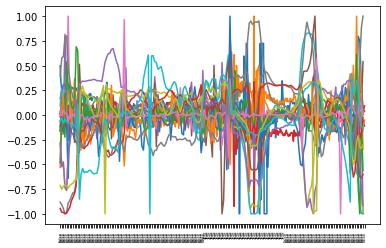

In [269]:
plot_recording(rec)